<a href="https://colab.research.google.com/github/Issey2023/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Salesv%20Completed%20Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Ismaa-eel Hendricks

## Project Overview

Sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Loading Data


In [40]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#import libraries
import pandas as pd
import numpy as np
import statistics
from pandas.core.arrays import string_
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from re import M

In [42]:
#load file path
fpath = '/content/drive/MyDrive/week 2 data folder/core project part 2/sales_predictions_2023.csv'

In [43]:
df_sp= pd.read_csv(fpath)

In [44]:
#view data
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
#creat another df, so we do not loose the original data.
df2 = df_sp.copy()

# **Data Cleaning**

In [46]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [47]:
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [48]:
df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [49]:
df_sp.shape

(8523, 12)

## Exploratory Data Analysis

1) How many rows and columns?



In [50]:
num_rows = df_sp.shape[0]
num_cols = df_sp.shape[1]
message = f'There are {num_rows} rows and {num_cols} columns in the dataset.'
print(message)

There are 8523 rows and 12 columns in the dataset.


2) What are the datatypes of each variable?


In [51]:
#what are the data types of each variable?
df_sp.select_dtypes(include='object').dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [52]:
#call up all the object columns and view rows
df_sp.select_dtypes(include='int').dtypes


Outlet_Establishment_Year    int64
dtype: object

In [53]:
df_sp.select_dtypes(include='float64').dtypes

Item_Weight          float64
Item_Visibility      float64
Item_MRP             float64
Item_Outlet_Sales    float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [54]:
#ID any duplicates?
df_sp.duplicated().sum()

0

There are no duplicate codes.

4) Identify missing values.

In [55]:
#check for missing values
df_sp.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
#convert missing values to %
df_sp.isnull().sum()/df_sp.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Item wieght has 1463 missing values and outlet size has 2410 missing values.


- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column.  
  - There are `2410` missing values in the `Outlet_Size` column.

- In order to make informed decisions about how to handle missing data, we will do some additional EDA.

## Clean Data

5) Address the missing values by using a placeholder value.


In [57]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-57-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-57-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


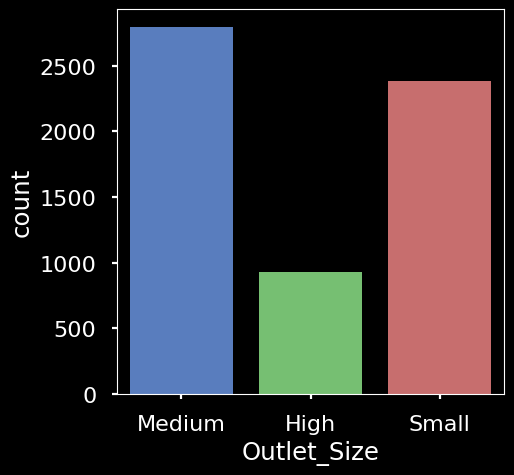

In [58]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data = df_sp, x = 'Outlet_Size');

 - This graph shows that there are over 2500 Medium size outlets and 2500 Small size outlets.
  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the word `Missing` for this feature.

- We will select `Strategy #3` to fill in the missing values with the word `mMissing` so that the values will be filled in, but we will still be aware that those values are unknown.

In [59]:
df_sp['Outlet_Size'].isna().sum()

2410

In [60]:
#lets start with the Categorical variables
df_sp['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [61]:
#now we will replace the null values with missing
df_sp['Outlet_Size'].fillna('Missing', inplace = True)
df_sp['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

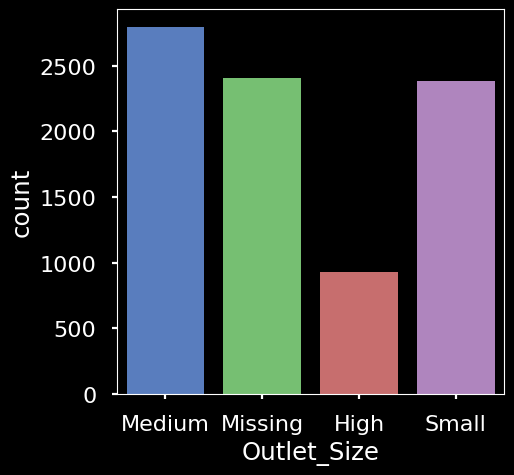

In [62]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data = df_sp, x = 'Outlet_Size');

In [63]:
#Now to check for any other missing values
df_sp.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

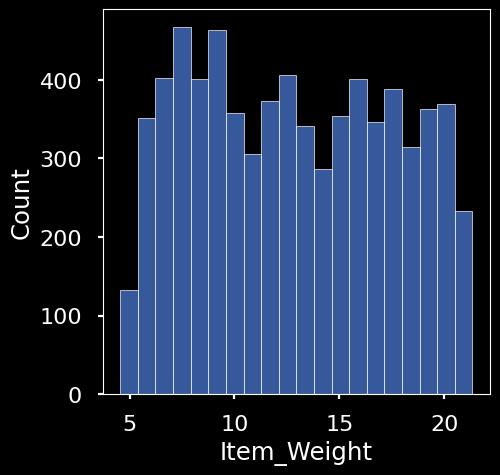

In [64]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(data = df_sp, x = 'Item_Weight');

In [65]:
df_sp['Item_Weight'].mean()

12.857645184135976

In [66]:
df_sp['Item_Weight'].median()

12.6

In [67]:
df_sp['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

- This histogram shows that the majority of the Item wieights are around 12.5 grams.

  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the `median/mean value` for this feature.

- To maintain as much data as possible, we will not drop the data. So we will choose either `Strategy #2` or `Strategy #3`. To make this choice we will do a bit more investigating.

In [68]:
# we will use the most frequent value, to fill in the missing values.
Most_frequent = df_sp['Item_Weight'].mode()[0]

# **6) Confirm that there are no missing values after addressing them.**

In [69]:
df_sp.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
print(df_sp['Item_Weight'].mean())
print(df_sp['Item_Weight'].median())
print(df_sp['Item_Weight'].mode())

12.857645184135976
12.6
0    12.15
Name: Item_Weight, dtype: float64


As the 'Item_Weight' is a float64, need to convert it to int64, but we can't due to the missing values

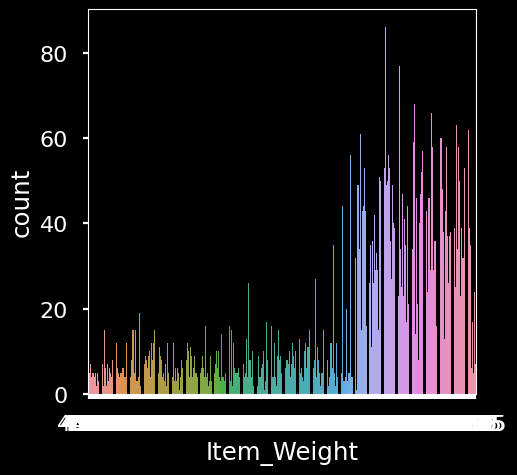

In [71]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data = df_sp, x = 'Item_Weight');


# **7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).**

In [72]:
df_sp.select_dtypes(include='float64').dtypes

Item_Weight          float64
Item_Visibility      float64
Item_MRP             float64
Item_Outlet_Sales    float64
dtype: object

In [73]:
df_sp['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [74]:
df_sp.select_dtypes(include='int').dtypes

Outlet_Establishment_Year    int64
dtype: object

In [75]:
df_sp.select_dtypes(include='object').dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [76]:
df_sp.describe()['Item_Weight']

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [77]:
from re import M
#Will use the most frequent value, to fill in the missing values.
Most_frequent = df_sp['Item_Weight'].mode()[0]
Most_frequent

12.15

In [78]:
#fill in the missing values with the most frequent value
df_sp['Item_Weight'].fillna(Most_frequent, inplace = True)

In [79]:
df_sp.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

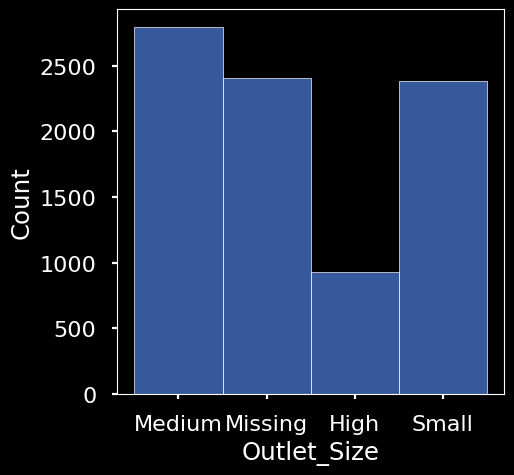

In [80]:
#same approach will take place for outlet size.
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(data = df_sp, x = 'Outlet_Size');

In [81]:
df_sp['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [82]:
#count outlet size null values
df_sp['Outlet_Size'].isna().sum()

0

In [83]:
#id data types in outlet size
df_sp['Outlet_Size'].dtypes

dtype('O')

As the data entered for outlet is an object, we will  fill in the missing values to Missing.

We can also drop the missing values from the data set, however its best paractice to include it in the data so we are able to report on it to exco. Which can be addressed with those collecting the data.

In [84]:
df_sp['Outlet_Size'] = df_sp['Outlet_Size'].fillna("Missing")
df_sp['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

6) Confirm that there are no missing values after addressing them.


In [85]:
df_sp.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [86]:
data_types = df_sp.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [87]:
pd.set_option('display.max_rows', None)
for col in str_cols:
    print(f'- {col}:')
    print(df_sp[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

In [88]:
#item content fat needs to be addressed:
df_sp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [89]:
#here we will rename, LF and low fat to low fat
df_sp['Item_Fat_Content'] = df_sp['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [90]:
#then we will rename, reg with Regular
df_sp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [91]:
df_sp['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [92]:
df_sp['Outlet_Type'] = df_sp['Outlet_Type'].replace({'Grocery_store': 'Supermarket_Type4'})


In [93]:
df_sp['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [97]:
df_sp['Item_Weight'] = df_sp['Item_Weight'].astype('int64')


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [98]:
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.330165,0.066132,140.992782,1997.831867,2181.288914
std,4.253895,0.051598,62.275067,8.371760,1706.499616
min,4.000000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.000000,0.328391,266.888400,2009.000000,13086.964800


In [99]:
stats =  df_sp.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.330165,0.066132,140.992782,1997.831867,2181.288914
min,4.000000,0.000000,31.290000,1985.000000,33.290000
max,21.000000,0.328391,266.888400,2009.000000,13086.964800
